## Detect Overfitting and Underfitting with Learning Curves

we'll be using three models to train the circular dataset below.
* A Decision Tree model,
* a Logistic Regression model, and
* a Support Vector Machine model.

One of the models overfits, one underfits, and the other one is just right. First, we'll write some code to draw the learning curves for each model, and finally we'll look at the learning curves to decide which model is which.
First, let's remember that the way the curves look for the three models, is as follows:

![](LearningCurve.png)


We will use the `learning_curve` method from sklearn:
```
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))
```
**Note**: As you can see, we defined our curves with Training and Testing Error, and this function defines them with Training and Testing Score. These are opposite, so the higher the error, the lower the score. Thus, when you see the curve, you need to flip it upside down in your mind, in order to compare it with the curves above.

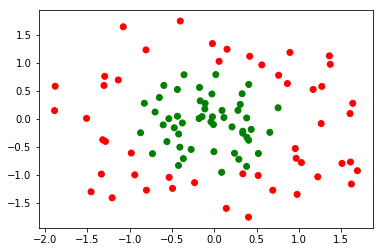

In [32]:
# Import, read, and split data
import pandas as pd
data = pd.read_csv('data.csv')
import numpy as np
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)
#---------plot figure-------------
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# ndarray
x1 = X[:,0:1]
x2 = X[:,1:2]
colors = ['red','green']
plt.scatter(x1.reshape(100,), x2.reshape(100,), c=y, cmap=ListedColormap(colors))
#--------- endplot figure-------------

In [33]:
### Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# TODO: Uncomment one of the three classifiers, and hit "Test Run"
# to see the learning curve. Use these to answer the quiz below.

### Logistic Regression
lr = LogisticRegression()

### Decision Tree
dt = GradientBoostingClassifier()

### Support Vector Machine
svm = SVC(kernel='rbf', gamma=1000)
print(data.shape)

(100, 3)


In [34]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2



def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()


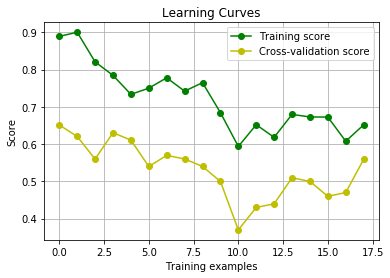

In [39]:
X2, y2 = randomize(X, y)
draw_learning_curves(X2,y2, lr, 18)

# as we can see below, this logistic regression is underfit

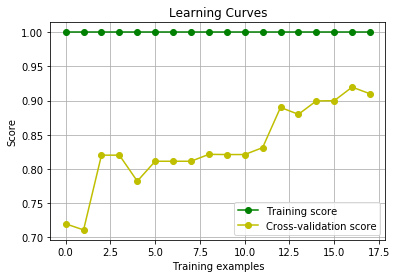

In [41]:
draw_learning_curves(X2,y2, dt, 18)

# As we can see below, this decision tree is the good fit

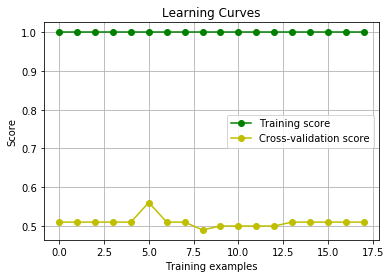

In [42]:
draw_learning_curves(X2,y2, svm, 18)

# as we can see below, this svm is overifit